<a href="https://colab.research.google.com/github/jayshivankar/Stats_for_ML/blob/main/Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# OUTLIERS

[1 2 3 4 5 5 5 6 7 9] <class 'numpy.ndarray'>
Mean: 4.7
Median: 5.0


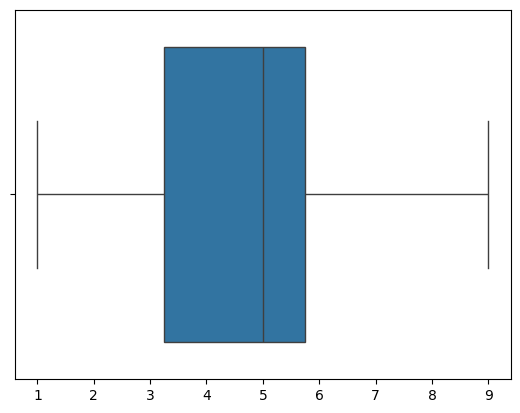

In [ ]:
# dummy dps
dps = np.array([1, 2, 3, 4, 5, 5, 5, 6, 7, 9])
print(dps, type(dps))

# mean of the array
print('Mean:', np.mean(dps))

# median of the array
print('Median:', np.median(dps))

# boxplot
sns.boxplot(dps, orient='h')
plt.show()

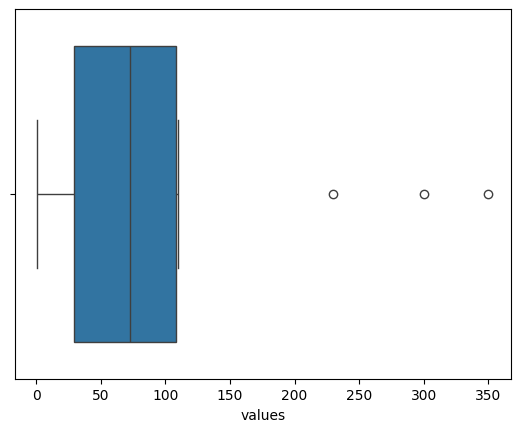

,values
count,14.000000
mean,104.285714
std,110.567368
min,1.000000
25%,29.250000
50%,72.500000
75%,108.250000
max,350.000000


In [ ]:
# creating a dataframe with outliers
lst_o = [1, 46, 29, 84, 12, 14, 103, 61, 90, 30, 110, 230, 300, 350]
data_o = pd.DataFrame(lst_o, columns=['values'])

# boxplot
sns.boxplot(data_o['values'], orient='h')
plt.show()

# finve number summary
data_o.describe()

In [ ]:
# Fences
q1 = data_o['values'].quantile(0.25)
q3 = data_o['values'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)

print(q1, q3, iqr, lower_fence, upper_fence, sep='\n')

29.25
108.25
79.0
-89.25
226.75


# NORMAL DISTRIBUTION

In [ ]:
# importing tips data
tips_data = sns.load_dataset('tips')

# data sample
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


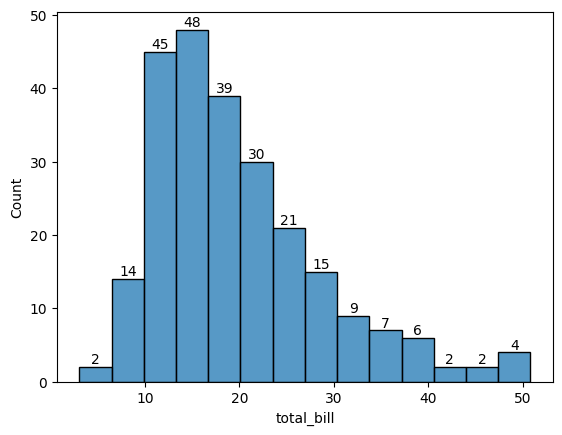

In [ ]:
# analyze total_bill column
ax = sns.histplot(tips_data['total_bill'])
ax.bar_label(ax.containers[0])
plt.show()

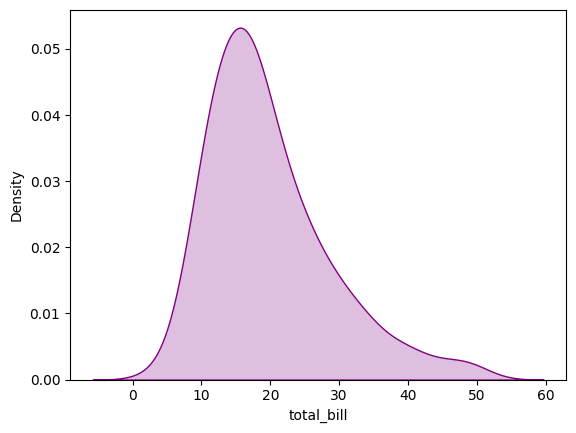

In [ ]:
# distribution curve
# KDE - Kernel density estimate

sns.kdeplot(tips_data['total_bill'], color='purple', fill=True)
plt.show()

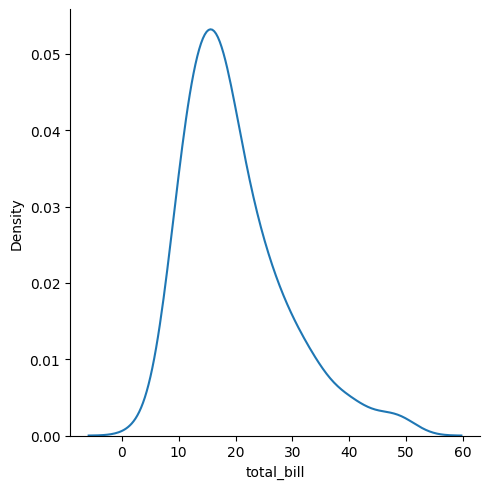

Mean: 19.78594262295082
Median: 17.795


In [ ]:
# displot for hist/ kde
sns.displot(tips_data['total_bill'], kind='kde')
plt.show()

# mean and median
print('Mean:', tips_data['total_bill'].mean())
print('Median:', tips_data['total_bill'].median())

Mean: 19.78594262295082
Median: 17.795


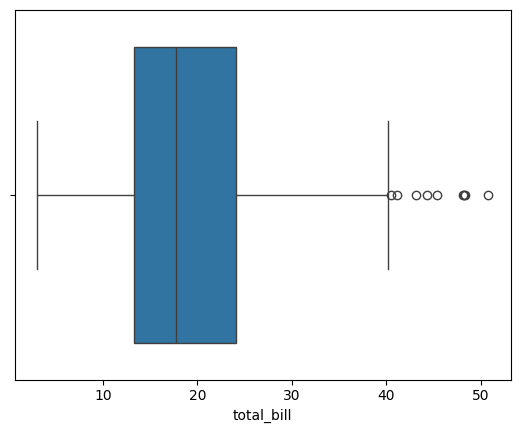

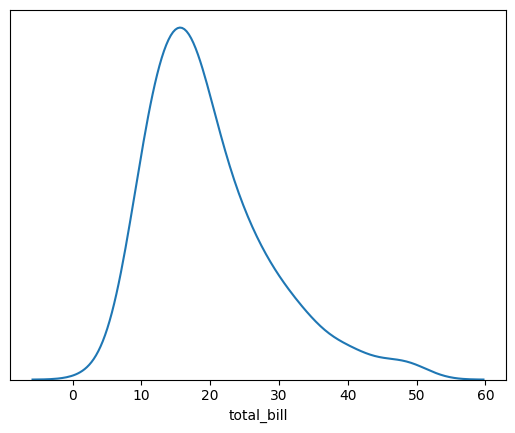

In [ ]:
# mean and median
print('Mean:', tips_data['total_bill'].mean())
print('Median:', tips_data['total_bill'].median())

# boxplot
sns.boxplot(tips_data['total_bill'], orient='h')
plt.show()
sns.kdeplot(tips_data['total_bill'])
plt.yticks([])
plt.ylabel('')
plt.show()

Mean: 2.99827868852459
Median: 2.9


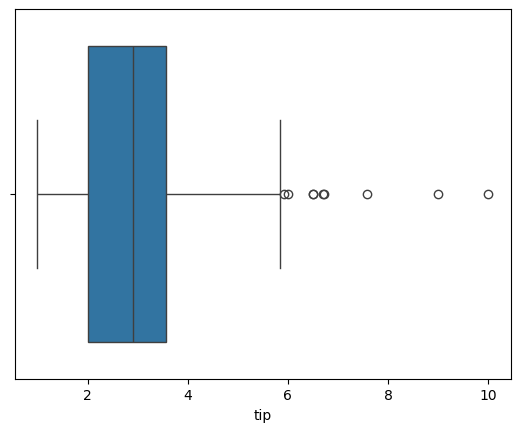

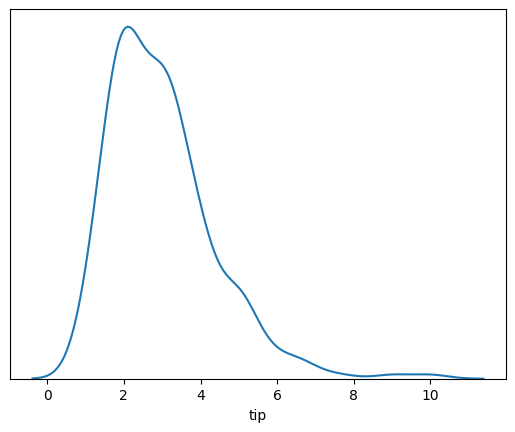

In [ ]:
# mean and median
print('Mean:', tips_data['tip'].mean())
print('Median:', tips_data['tip'].median())

# boxplot
sns.boxplot(tips_data['tip'], orient='h')
plt.show()
sns.kdeplot(tips_data['tip'])
plt.yticks([])
plt.ylabel('')
plt.show()

In [ ]:
# Treating the outliers in the tip column
q1 = tips_data['tip'].quantile(0.25)
q3 = tips_data['tip'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1-1.5*(iqr)
upper_fence = q3+1.5*(iqr)

# create duplicate of the tip data
tips_data['treated_tip'] = tips_data['tip']

# trim the outlier to the fence values
tips_data['treated_tip'] = np.where(tips_data['treated_tip']<lower_fence, lower_fence, tips_data['treated_tip'])
tips_data['treated_tip'] = np.where(tips_data['treated_tip']>upper_fence, upper_fence, tips_data['treated_tip'])

# data sample
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,treated_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,1.01
1,10.34,1.66,Male,No,Sun,Dinner,3,1.66
2,21.01,3.50,Male,No,Sun,Dinner,3,3.50
3,23.68,3.31,Male,No,Sun,Dinner,2,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,3.61


Mean: 2.9500256147540984
Median: 2.9


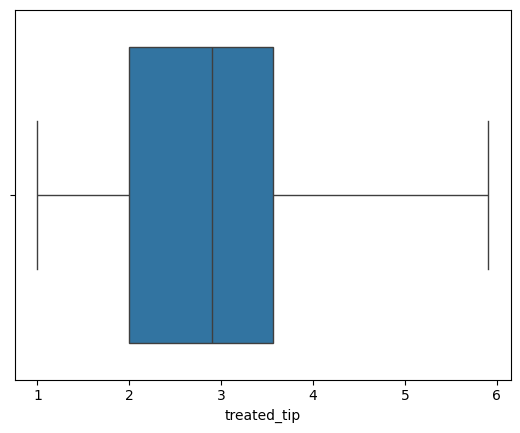

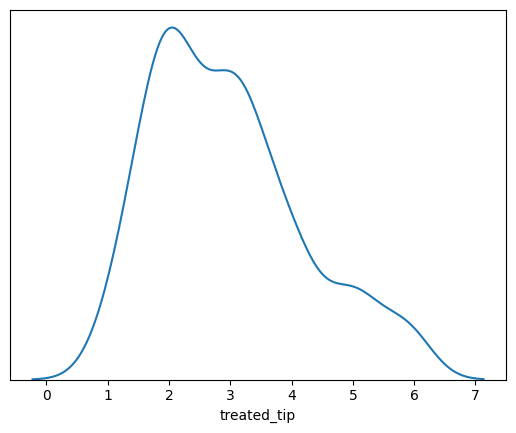

In [ ]:
# mean and median
print('Mean:', tips_data['treated_tip'].mean())
print('Median:', tips_data['treated_tip'].median())

# boxplot
sns.boxplot(tips_data['treated_tip'], orient='h')
plt.show()
sns.kdeplot(tips_data['treated_tip'])
plt.yticks([])
plt.ylabel('')
plt.show()

In [ ]:
# Treating the outliers in the tip column
q1 = tips_data['total_bill'].quantile(0.25)
q3 = tips_data['total_bill'].quantile(0.75)
iqr = q3 - q1
lower_fence = q1-1.5*(iqr)
upper_fence = q3+1.5*(iqr)

# trim the outlier to the fence values
tips_data['treated_bill'] = tips_data['total_bill'].clip(lower=lower_fence, upper=upper_fence)

# data sample
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,treated_tip,treated_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,1.01,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,1.66,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,3.50,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,3.31,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,3.61,24.59


Mean: 19.591670081967216
Median: 17.795


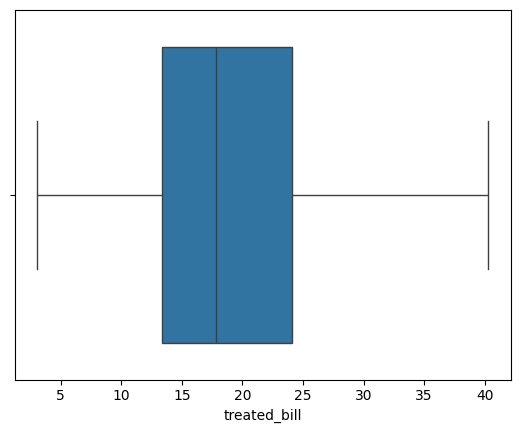

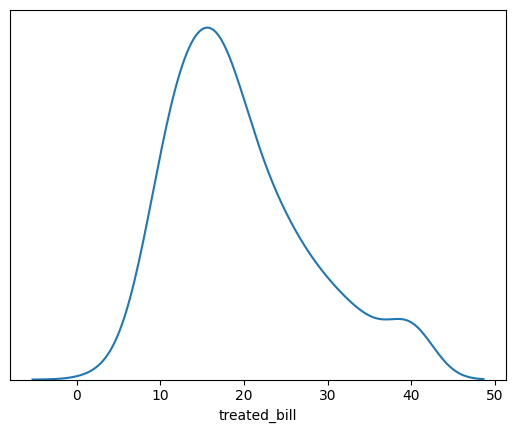

In [ ]:
# mean and median
print('Mean:', tips_data['treated_bill'].mean())
print('Median:', tips_data['treated_bill'].median())

# boxplot
sns.boxplot(tips_data['treated_bill'], orient='h')
plt.show()
sns.kdeplot(tips_data['treated_bill'])
plt.yticks([])
plt.ylabel('')
plt.show()

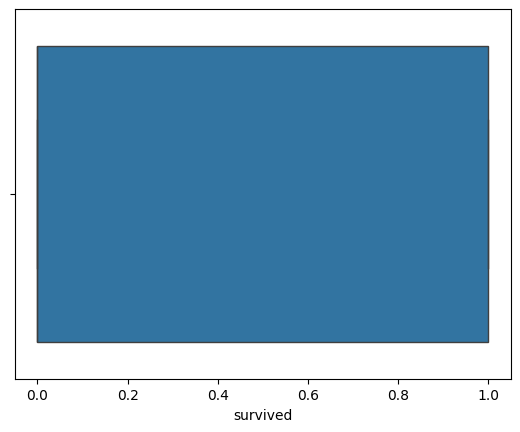

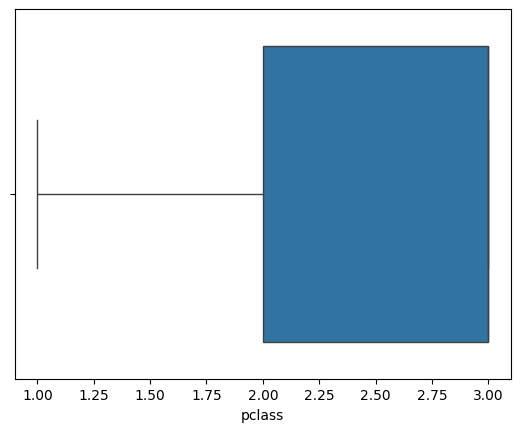

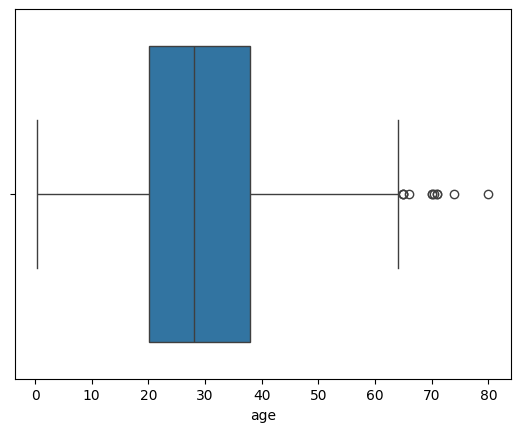

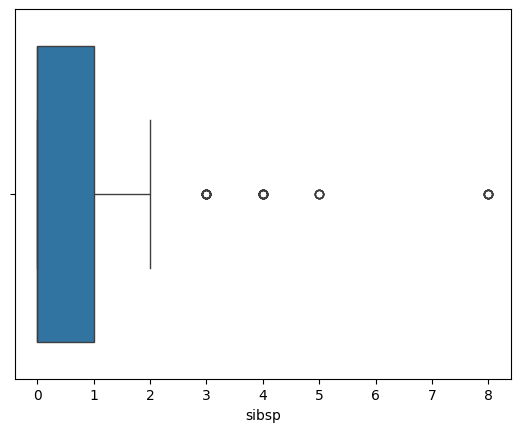

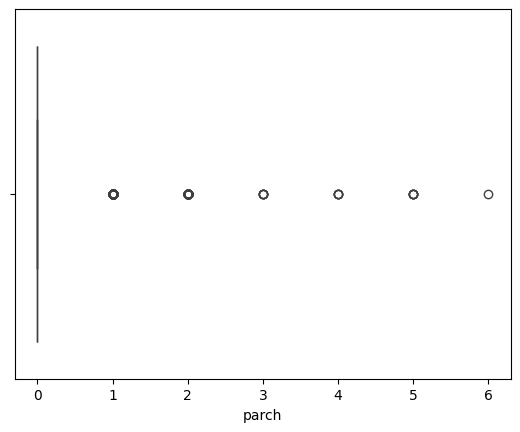

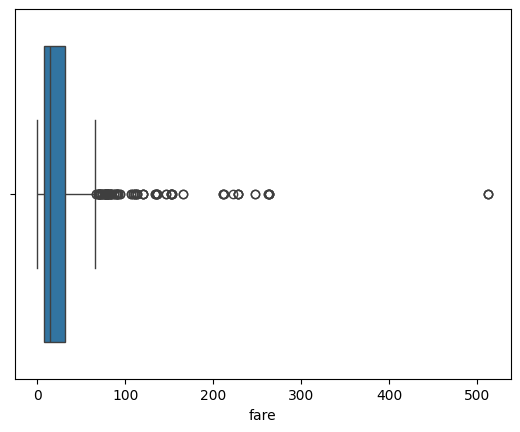

In [ ]:
# importing titanic data
titanic_data = sns.load_dataset('titanic')

# data sample
titanic_data.head()

# numerical column boxplot
for cols in titanic_data:
    if titanic_data[cols].dtypes in ['int', 'float']:
        sns.boxplot(titanic_data[cols], orient='h')
        plt.show()

In [ ]:
# using the raw data

for cols in titanic_data:
    if titanic_data[cols].dtypes in ['int', 'float'] and cols != 'parch':
        # fences
        q1 = titanic_data[cols].quantile(0.25)
        q3 = titanic_data[cols].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1-1.5*(iqr)
        upper_fence = q3+1.5*(iqr)

        # clipping
        titanic_data[cols] = titanic_data[cols].clip(lower=lower_fence, upper=upper_fence)

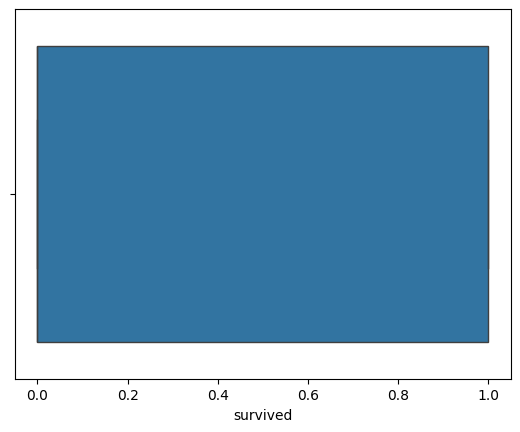

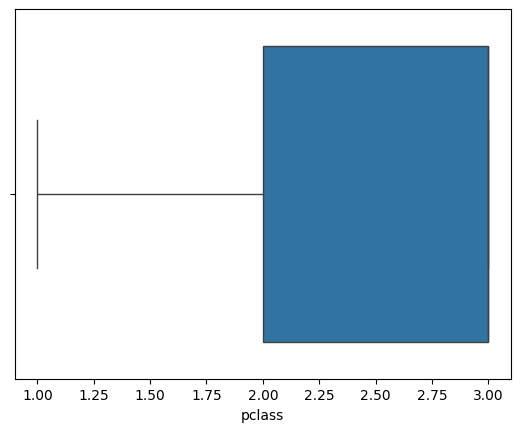

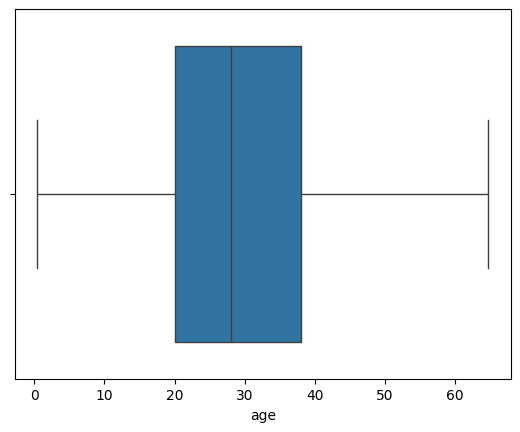

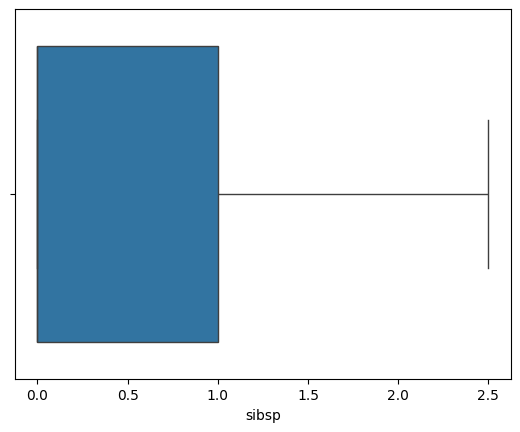

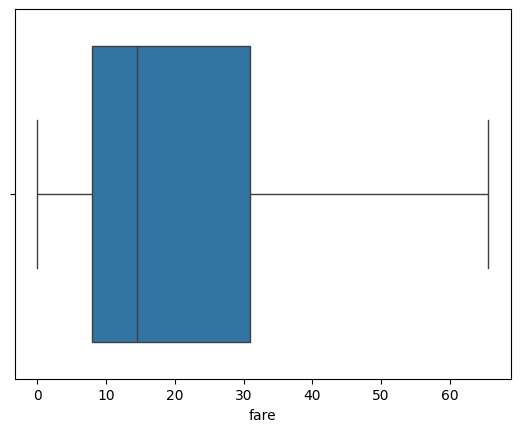

In [ ]:
# boxplot after treating
for cols in titanic_data:
    if titanic_data[cols].dtypes in ['int', 'float'] and cols != 'parch':
        sns.boxplot(titanic_data[cols], orient='h')
        plt.show()

# Normal Distribution and Standard normal distribution

In [ ]:
# penguin data
penguin_data = sns.load_dataset('penguins')

# data sample
penguin_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# drop the missing missing values
penguin_data.dropna(inplace=True)

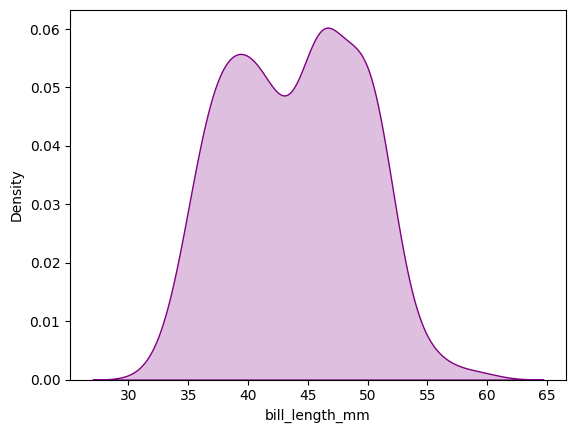

Mean: 43.92
SD: 5.46


In [ ]:
# distribution of "bill_length_mm" before standardisation
sns.kdeplot(penguin_data['bill_length_mm'], color='purple', fill=True)
plt.show()

# stats
print('Mean:', round(penguin_data['bill_length_mm'].mean(), 2))
print('SD:', round(penguin_data['bill_length_mm'].std(), 2))

In [ ]:
# to conver normal distribution to standard normal distribution

    # z-score = (x-mean)/SD
    # we use sklearn library

# importing sklearn for standardisation
from sklearn.preprocessing import StandardScaler

In [ ]:
# lets scale bill_length_mm
scale = StandardScaler()
scaled_bill_length = scale.fit_transform(penguin_data[['bill_length_mm']])

# stats
print('Mean:', round(np.mean(scaled_bill_length),2))
print('SD:', round(np.std(scaled_bill_length), 2))

Mean: 0.0
SD: 1.0


In [ ]:
# stats summary of the data
penguin_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# lets scale complete data

# extract numerical cols only
num_cols = penguin_data.select_dtypes(include=['int', 'float'])

# transform the data
num_cols_scaled = scale.fit_transform(num_cols)

# convert the returned array to dataframe
num_cols_scaled = pd.DataFrame(num_cols_scaled, columns=scale.get_feature_names_out())

# standardized sample
num_cols_scaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


In [ ]:
# # stats summary of the data after scaling
num_cols_scaled.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,3.840772e-16,6.401286e-16,2.133762e-16,-1.707010e-16
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00


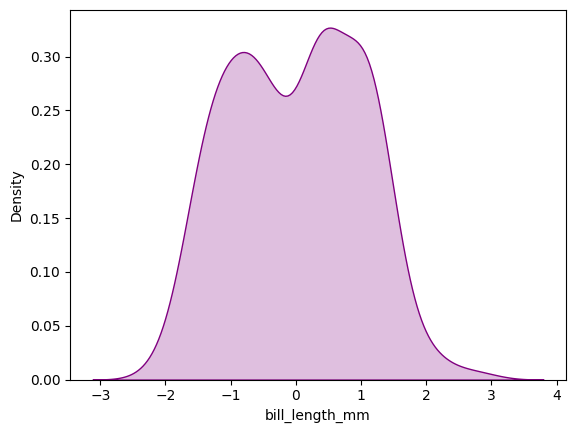

Mean: 0.0
SD: 1.0


In [ ]:
# distribution of "bill_length_mm" after standardisation
sns.kdeplot(num_cols_scaled['bill_length_mm'], color='purple', fill=True)
plt.show()

# stats
print('Mean:', round(num_cols_scaled['bill_length_mm'].mean(), 2))
print('SD:', round(num_cols_scaled['bill_length_mm'].std(), 2))

# Homework

    # convert tips data from normal to standard normal
    # convert titanic data from normal to standard normal